In [21]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import mpmath as mp

#### 1. Read production data from CSV file

In [22]:
#Extract api#, monthly_oil and date from Drillinginfo File
df = pandas.read_csv('Monthly_Production.CSV')
oil = np.array(df['Monthly Oil'].values)
api_well = np.array(df['API/UWI'].values)
pro_month = np.array(df['Monthly Production Date'].values)
unique_ids=len(np.unique(api_well))
print('Total number of wells are: {}'.format (unique_ids)) # Confirming all 153 wells are read into memory

Total number of wells are: 153


#### 2. Data Preparation
* Split each individual well's production data into an array
* Pick a well, and plot the original production data
* Take first 12 month of log(oil rate) as training data

In [23]:
ID_0 = api_well[0]
i=0
j=0
k=0
oil_array=np.zeros((unique_ids,36),dtype=int)
for ID in api_well:
    if ID==ID_0:
        oil_array[i,j]=oil[k]
        j=j+1
    else:
        ID_0=ID
        i=i+1
        j=0
    k=k+1 

**Selecting well number 3 production data for fitting**

#### Selecting log transformed first twelve months of data for fitting

In [24]:
def Jacobi_theta(t,logQi,chi,eta):
    Qt = np.zeros(len(t))
    for i in range(len(t)):
        Qt[i] = logQi + np.log10(float(mp.jtheta(2,chi,np.exp(-eta*t[i]))))
    return Qt

In [25]:
def post(logQi,chi,eta,sigma,t,data):
    like = np.prod(np.exp(-np.power(Jacobi_theta(t,logQi,chi,eta)-data, 2)/sigma**2))
    return like # because constant uniform prior

In [29]:
tt_test = np.linspace(1,24,24)
#selected_wells=np.array([7,8,9,10,11,12,13,14,16])
selected_wells=np.linspace(0,149,150,dtype=int)
plot_no=0
grid_sz=np.sqrt(len(selected_wells))
qq_p10=np.zeros([len(selected_wells),24])
qq_p90=np.zeros([len(selected_wells),24])

for well_no in selected_wells:
    cur = oil_array[selected_wells[plot_no]]
    rec_month = np.count_nonzero(cur)
    data = np.log10(cur[0:12])


    t=np.arange(0,12)
 
    logQi = data[0]
    #logQi = 4
    chi = 0.5
    eta = 0.5
    t_fine = np.linspace(0.01,11,119)
    t = np.linspace(1,12,12)
    Niter = 10000
    chain = np.zeros((Niter,3))
    chain[0,0] = logQi# Initialize the chain with first guess
    chain[0,1] = chi
    chain[0,2] = eta
    
    sigma=0.05

    for ii in np.arange(Niter-1):
            if ii%1000 ==0:
                print('iteration {}'.format(ii))
            logQi    = chain[ii,0] 
            chi      = chain[ii,1] 
            eta      = chain[ii,2] 
            chi_p    = float(chi + np.random.normal(loc=0.0,scale=0.1,size=1))
            logQi_p  = float(logQi + np.random.normal(loc=0.0,scale=0.1,size=1))
            eta_p     = float(eta + np.random.normal(loc=0.0,scale=0.1,size=1))

            if chi_p < 0 or eta_p<0 or logQi_p > 7 or logQi_p< -2:
                chain[ii+1,:] = chain[ii,:]
            elif (post(logQi_p,chi_p,eta_p,sigma,t,data) / post(logQi,chi,eta,sigma,t,data)) > np.random.uniform():
                chain[ii+1,0] = logQi_p 
                chain[ii+1,1] = chi_p 
                chain[ii+1,2] = eta_p 
            else:
                chain[ii+1,:] = chain[ii,:]
    print('Sampling finished at iteration {}'.format(Niter)) 

    chain = chain[1000:]#burnin######################update back

    #Testing
    plt.rcParams['figure.figsize'] = (8, 4)
    chains_to_plot=np.arange(1000)*9
    kk=0
    qq=np.zeros([len(chains_to_plot),24])
    
    for ii in chains_to_plot:
        qq[kk,:]=Jacobi_theta(tt_test,chain[ii,0],chain[ii,1],chain[ii,2])
        kk+=1

    for tt in np.arange(0,24):
        sorted_qq=np.sort(qq[:,tt])
        ixL = np.floor(np.size(sorted_qq)*0.1).astype(int) ## lower index
        ixU = np.floor(np.size(sorted_qq)*0.9).astype(int) ## upper index
        qq_p10[plot_no,tt]=sorted_qq[ixL]
        qq_p90[plot_no,tt]=sorted_qq[ixU]
    plot_no=plot_no+1

iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000


C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
itera

C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars


iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
itera

iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
i

iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
itera

Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000


3000

C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


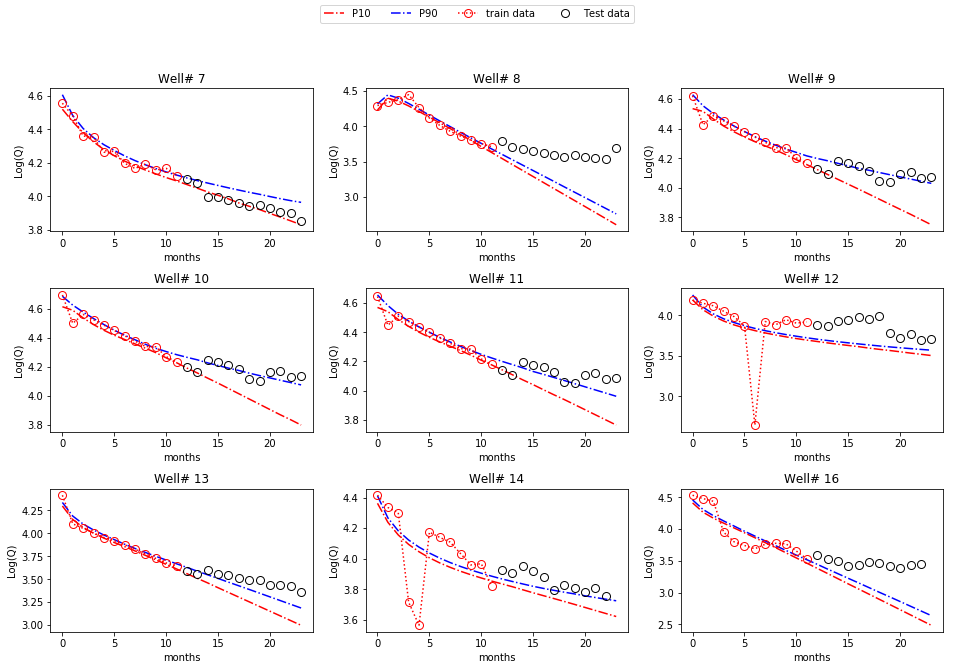

In [16]:
plt.rcParams['figure.figsize'] = (16,10)
marker_style = dict(color='r', linestyle=':', marker='o',
                    markersize=8, markerfacecoloralt='gray')
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=1)

plot_no=0
for well_no in selected_wells:
    cur = oil_array[selected_wells[plot_no]]
    data = np.log10(cur[0:12])
    aa = fig.add_subplot(grid_sz,grid_sz, plot_no+1)
    fig.subplots_adjust(hspace=0.4, wspace=.2)
    aa.plot(qq_p10[plot_no,:],'r-.',label='P10')
    aa.plot(qq_p90[plot_no,:],'b-.',label='P90')
    aa.set(xlabel='months', ylabel='Log(Q)',title='Well# {}'.format(selected_wells[plot_no]));
    aa.plot(data,'ro',fillstyle='none',**marker_style,label='train data')
    aa.plot(np.linspace(12,23,12),np.log10(cur[12:24]),'ko',fillstyle='none',markersize=8,label='Test data' )
    #aa.legend(loc='upper right');
    plot_no=plot_no+1;
handles, labels = aa.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',ncol=4);

In [18]:
plot_no=0
count=np.zeros([9,12])
#count_int=0
for well_no in selected_wells:
    cur = oil_array[selected_wells[plot_no]]
    data = np.log10(cur[12:24])
    q_p10=qq_p10[plot_no,12:24]
    q_p90=qq_p90[plot_no,12:24]
    
    for jj in np.arange(0,12):
        if data[jj]<q_p90[jj] and data[jj]>q_p10[jj]:
            count[plot_no,jj]=1
    
    plot_no=plot_no+1;
sum(sum(count))/(len(data)*len(selected_wells)) 

C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


0.18518518518518517

Chains seem to converge after 10000 iterations.

#### ARPs-Posterior Summary
Mean values of the fitted parameters

Confidence interval of the fit is calculated by drawing different samples from chains.

Individual parameter distributions are shown below

### Hyberbolic Transient Function
Corelation for Jacobi Theta function is provided below.
$$Equation to be added$$
In theta function model parameter $b$ from arps is further parameterized into $b_f$ and $t_{elf}$.

Jacobi Theta function

iteration 0


IndexError: index 9000 is out of bounds for axis 0 with size 9000

### Hyperbolic Transient-Posterior Summaries
Mean value of the fitted parameters is as follows.

Drawing from chains to develop confidence interval

Distribution of individual parameters

### Jacobi Theta Function
Corelation for Jacobi Theta function is provided below.
$$Equation to be added$$

In [ ]:
plt.rcParams['figure.figsize'] = (12, 2.5)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

ax = fig.add_subplot(1, 3, 1)
ax.plot(chain[:,0],color='r',alpha=.5);
ax.set(xlabel='Qi_p', ylabel='Magnitude'); 

ax = fig.add_subplot(1, 3, 2)
ax.plot(chain[:,1],color='r',alpha=.5);
ax.set(xlabel='chi_p', ylabel='Magnitude'); 

ax = fig.add_subplot(1, 3, 3)
ax.plot(chain[:,2],color='r',alpha=.5);
ax.set(xlabel='eta_p', ylabel='Magnitude'); 

In [ ]:
chain = chain[1000:]#burnin
#np.size(chain[:,2])

In [ ]:
logQi_t=round(np.mean(chain[:,0]),3)
chi=round(np.mean(chain[:,1]),3)
eta=round(np.mean(chain[:,2]),3)
print('Mean of D     ={}'.format(logQi_t))
print('Mean of logQi ={}'.format(chi))
print('Mean of b     ={}'.format(eta))

In [ ]:
plt.rcParams['figure.figsize'] = (8, 4)
y_theta =  Jacobi_theta(t,logQi_t,chi,eta)
y_theta_test =  Jacobi_theta(tt_test,logQi_t,chi,eta)
plt.plot(y_theta,'b-')
plt.plot(data,'ro',fillstyle='none',**marker_style)
aa.set(xlabel='months', ylabel='Oil Production'); 


In [ ]:
plt.rcParams['figure.figsize'] = (10, 4)

chains_to_plot=np.arange(1000)*9
fig = plt.figure()
aa = fig.add_subplot(1, 2, 1)
aa.plot(data,'ro',fillstyle='none',**marker_style)
kk=0
qq=np.zeros([len(chains_to_plot),len(t)])
for ii in chains_to_plot:
    qq[kk,:]=Jacobi_theta(t,chain[ii,0],chain[ii,1],chain[ii,2])
    aa.plot(qq[kk,:],color='blue',alpha=0.002)
    kk+=1
    aa.set(ylim=(3.8, 4.4),xlabel='months', ylabel='Oil Production')
    
qq_p10=np.zeros(len(t))
qq_p90=np.zeros(len(t))
for tt in np.arange(0,12):
    sorted_qq=np.sort(qq[:,tt])
    ixL = np.floor(np.size(sorted_qq)*.1).astype(int) ## lower index
    ixU = np.floor(np.size(sorted_qq)*.9).astype(int) ## upper index
    qq_p10[tt]=sorted_qq[ixL]
    qq_p90[tt]=sorted_qq[ixU]
aa = fig.add_subplot(1, 2, 2)
aa.plot(qq_p10,'ko',fillstyle='none')
aa.plot(qq_p90,'ko',fillstyle='none')
aa.set(ylim=(3.8, 4.4),xlabel='months', ylabel='P10 and P90');

In [ ]:
plt.rcParams['figure.figsize'] = (13, 2.5)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.25)

ax = fig.add_subplot(1, 3, 1)
ax.hist(chain[:,0],25,density=True,color='blue');
ax.set(xlabel='LogQi_p', ylabel='Magnitude'); 

ax = fig.add_subplot(1, 3, 2)
ax.hist(chain[:,1],25,density=True,color='blue');
ax.set(xlabel='Chi', ylabel='Magnitude'); 

ax = fig.add_subplot(1, 3, 3)
ax.hist(chain[:,2],25,density=True,color='b');
ax.set(xlabel='eta', ylabel='Magnitude'); 

### Model Testing
12 months of data was used for fitting. Remaining months of data is used for testing. 

### Validation
Curve parameters are fitting using Least Square for validation. Usually MCMC is applied where sampling from poterior is possible or closed form corelations are not available. 

In [ ]:
Di_bf = 0.5
logQi_bf = 4
b = 0.5

params, params_covariance = optimize.curve_fit(Arps, t, data,
                                               p0=[0.22,4.3,2])
y_hat = Arps(tt_test,params[0],params[1],params[2])
#sigma = np.sqrt(np.sum(np.power(data-y_hat,2))/(len(tt_test)-3))
#print('Variance is {}'.format(sigma))

In [ ]:
#testing and RSS
plt.rcParams['figure.figsize'] = (8, 4)

fig = plt.figure()
aa = plt.axes()

aa.set(xlabel='months', ylabel='P10 and P90',title='Test and train data');
aa.plot(data,'ro',fillstyle='none',**marker_style,label='train data')
aa.plot(np.linspace(12,23,12),np.log10(cur[12:24]),'ko',fillstyle='none',markersize=8,label='Test data' )
aa.plot(data,'ro',fillstyle='none');
aa.plot(y_hat,'k-',label='Least square fit');
aa.plot(y_arps_test,'r-.',label='Arps test and train')
aa.plot(y_trans_test,'b-.',label='Transient test and train')
aa.plot(y_theta_test,'g-.',label='Jacobi test and train')
aa.set(xlabel='months', ylabel='Oil Production');
aa.legend(loc='upper right');

In [ ]:
datt=np.log10((oil_array[3][:23]))

In [ ]:
rms_y_hat_train=np.mean(np.sqrt((datt[:11]-y_hat[:11])**2))*100
print('rms_y_hat_train is {}'.format(rms_y_hat_train))
rms_y_hat_test=np.mean(np.sqrt((datt[11:23]-y_hat[11:23])**2))*100
print('rms_y_hat_test is {}'.format(rms_y_hat_test))

rms_y_arps_train=np.mean(np.sqrt((datt[:11]-y_arps_test[:11])**2))*100
print('rms_y_arps_train is {}'.format(rms_y_arps_train))
rms_y_arps_test=np.mean(np.sqrt((datt[11:23]-y_arps_test[11:23])**2))*100
print('rms_y_arps_test is {}'.format(rms_y_arps_test))

rms_y_trans_train=np.mean(np.sqrt((datt[:11]-y_trans_test[:11])**2))*100
print('rms_y_trans_train is {}'.format(rms_y_trans_train))
rms_y_trans_test=np.mean(np.sqrt((datt[11:23]-y_trans_test[11:23])**2))*100
print('rms_y_trans_test is {}'.format(rms_y_trans_test))

rms_y_theta_train=np.mean(np.sqrt((datt[:11]-y_theta_test[:11])**2))*100
print('rms_y_theta_train is {}'.format(rms_y_theta_train))
rms_y_theta_test=np.mean(np.sqrt((datt[11:23]-y_theta_test[11:23])**2))*100
print('rms_y_theta_test is {}'.format(rms_y_theta_test))

